In [2]:
import json
import random
import cv2
import numpy as np
from PIL import Image
import uuid
import argparse
import requests
import time
import re

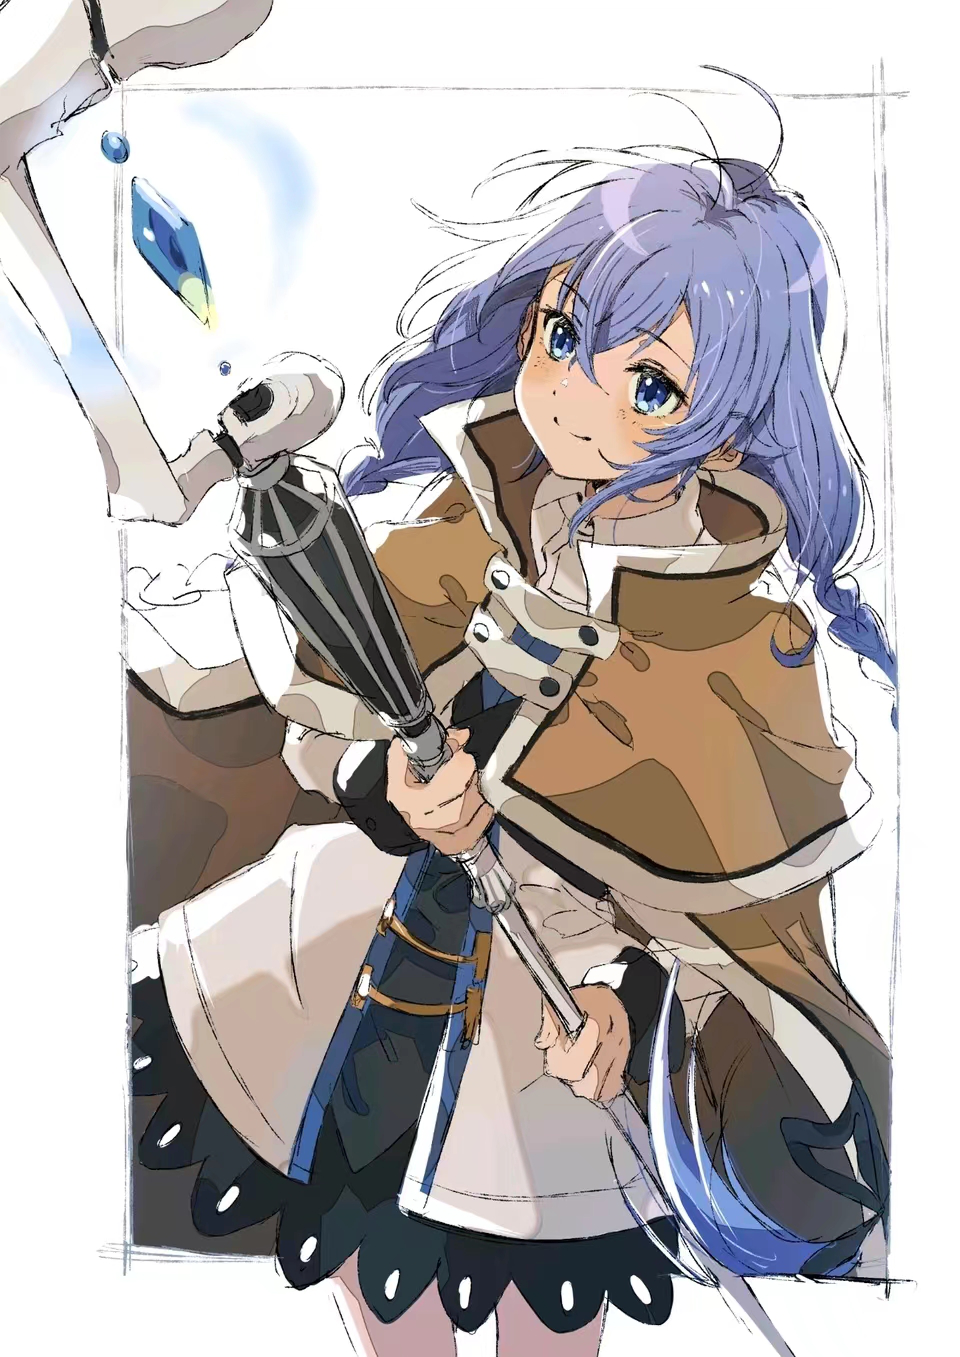

In [3]:
image_path = "/mnt/petrelfs/songmingyang/code/tools/test_imgs/roxy.jpeg"
image = Image.open(image_path).convert("RGB")
image

In [4]:
def get_sorted_bbox(img):
    image = np.array(img)
    if image.ndim == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    gaussian = cv2.GaussianBlur(gray,(3,3),cv2.BORDER_DEFAULT)
    edged = cv2.Canny(gaussian, 100, 200) 
    contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contours = sorted(contours, key= len, reverse=True)[:10]
    longest_contour = sorted_contours[0]
    x,y,w,h = cv2.boundingRect(np.concatenate(longest_contour))
    longest_box = w + h

    sorted_bbox = []
    for c in sorted_contours:
        x,y,w,h = cv2.boundingRect(np.concatenate(c))
        if longest_box - 10 < w + h <= longest_box + 10:
            repeat = False
            for bb in sorted_bbox:
                if abs(bb['x1'] - x) < 10 and abs(bb['y1'] - y) < 10 and abs(bb['x2'] - (x+w)) < 10 and abs(bb['y2'] - (y+h)) < 10:
                    repeat = True
            if not repeat:
                sorted_bbox.append({'x1': x, 'y1': y, 'x2': x + w, 'y2': y + h})
    sorted_bbox_json = json.dumps(sorted_bbox)
    
    return sorted_bbox_json

In [7]:
def get_subplot_images(img, sorted_bbox_json):
    sorted_bbox = json.loads(sorted_bbox_json)

    image = np.array(img)
    if image.ndim == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
    result_images = []

    for bbox in sorted_bbox:
        
        masked_image = image.copy()
        
        for other_bbox in sorted_bbox:
            if other_bbox != bbox:
                x1, y1, x2, y2 = other_bbox['x1'], other_bbox['y1'], other_bbox['x2'], other_bbox['y2']
                cv2.rectangle(masked_image, (x1, y1), (x2, y2), (255, 255, 255), -1)

        pil_image = Image.fromarray(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
        result_images.append(pil_image)

    return result_images

In [8]:
a = get_sorted_bbox(image)
a = get_subplot_images(image, a)

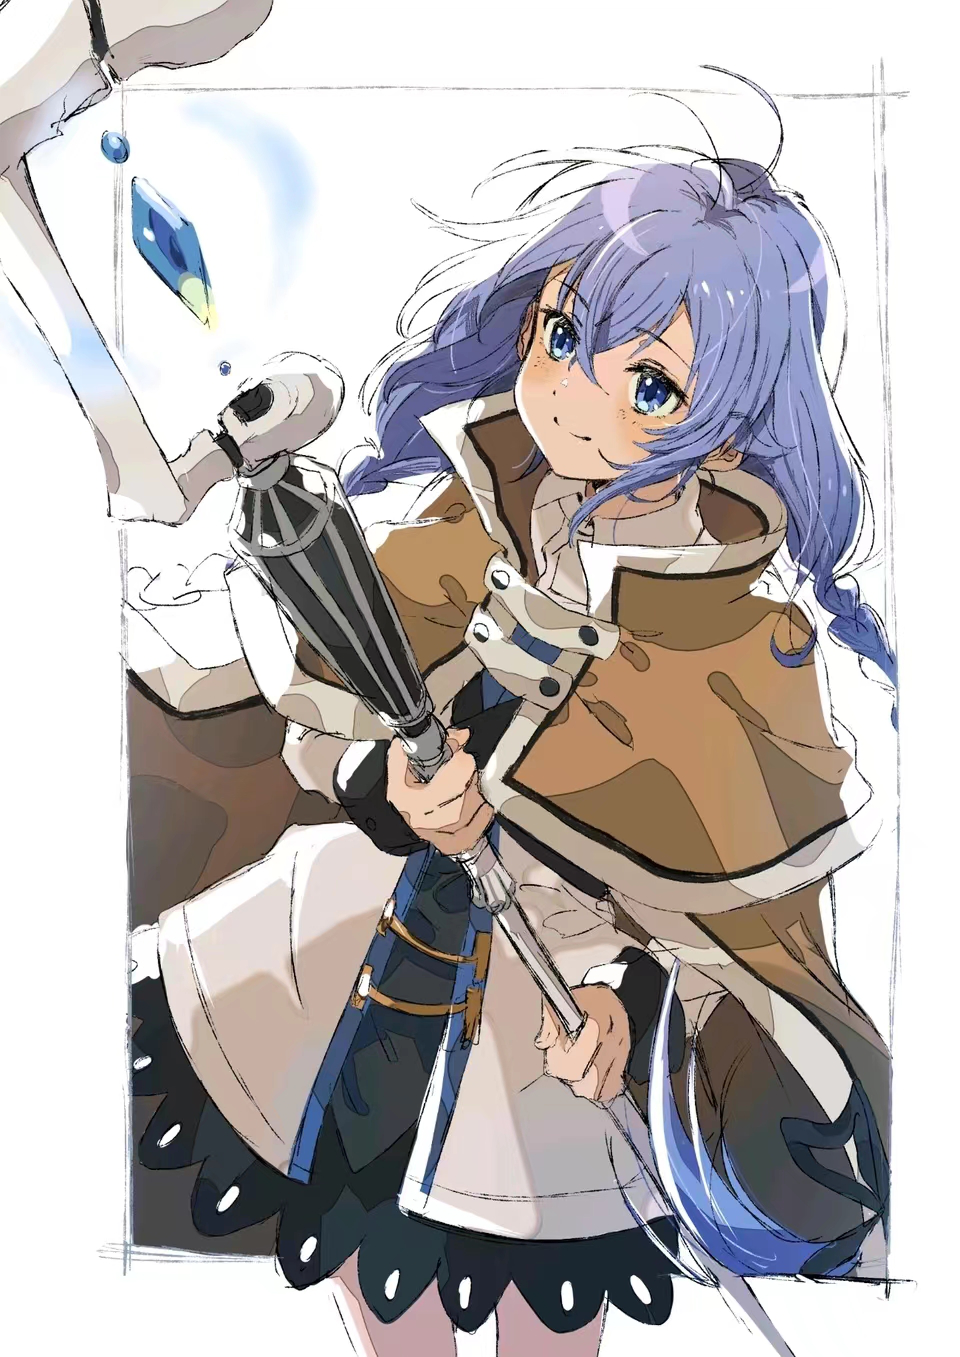

In [10]:
a[0]